<center><h1> TD N°1 : SVM avec sklearn <center><h1>

## Import package

In [26]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

#Web request
import requests
import io

## Function


In [27]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [28]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coéfficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisée.
      ATTENTION à passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [102]:
#1
#Import dataset from sklearn

sk_iris = datasets.load_iris()

#Si besoin
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

In [103]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [105]:
#Renommer les colonnes! Le format n'est pas adapté pour coder
#Création d'un liste contenant le nom des features, ca vous facilitera la vie par la suite
features_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris.columns = features_names

In [106]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [74]:
#Species au mauvais format, format float. 
# On veut un integer
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [75]:
# 5 lignes au harsard dans le dataset
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
76,6.8,2.8,4.8,1.4,1.0
80,5.5,2.4,3.8,1.1,1.0
137,6.4,3.1,5.5,1.8,2.0
66,5.6,3.0,4.5,1.5,1.0
36,5.5,3.5,1.3,0.2,0.0


#### 2) Statistiques descriptives

In [12]:
#Statistiques intéréssante sur le dataframe
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [109]:
#Nb de NA par feature

iris.isna().sum(axis=0)

#Iris.isna() retourne un true/false
#sum(axis=0) va faire la sum par colonne et true=1 false=0

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [108]:
#Exemple sum booléen sous python
print(sum([True, False, True]))

2


In [15]:
#Analyse des corélations
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
species,0.798078,-0.440290,0.935431,0.938179,1.000000


In [76]:
#Pour mettre un peu de pailette...
corr = iris.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
species,0.798078,-0.440290,0.935431,0.938179,1.000000


> Je vous laisse voir s'il y a des outliers dans le dataset

#### 3) Recoder variables, si besoin

In [110]:
#Transformer float en int
iris['species'] = iris.species.astype('int32')


### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [112]:
#On a retiré l'espèce numéro 2, on peut aussi bien retirer la 1 ou 0
bin_iris = iris[iris.species!=2]

#### 4) Découper data set en train et test

In [21]:
X_train , X_test, y_train, y_test = train_test_split(bin_iris.iloc[:,:4],  
                                                    bin_iris['species'], 
                                                    test_size=0.2 ,
                                                    shuffle=True ,
                                                    random_state=42
                                                   )

In [22]:
#Target équilibrée. On retrouve bien nos 2 targets
y_train.value_counts()

species
1    42
0    38
Name: count, dtype: int64

In [23]:
#Target équilibré. On retrouve bien nos 2 targets
y_test.value_counts()

species
0    12
1     8
Name: count, dtype: int64

#### 5) Importer les modules pour la modélisation

In [ ]:
#... au début du code

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features

⚠️ Bien que les features de IRIS sont exprimées avec la même unité "cm". **On réalise un feature scaling**

In [29]:
#On utilise StandarScaler uniquement sur le X_train pour calculer les moyennes!
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [115]:
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)



In [125]:
X_train_sc

array([[-0.86,  0.17, -0.2 , -0.21],
       [-0.03, -2.07, -0.2 , -0.21],
       [-1.69, -2.63, -1.05, -1.14],
       [-1.69,  1.58, -2.92, -2.45],
       [ 0.11, -0.39,  0.31, -0.21],
       [ 0.66,  1.01,  0.82,  1.66],
       [-0.58, -0.67,  0.31,  0.54],
       [-0.72,  0.17, -0.45, -0.77],
       [ 0.25, -0.39,  0.74,  1.1 ],
       [ 0.66,  0.45, -0.28, -0.4 ],
       [ 0.25,  0.73,  0.48,  1.29],
       [ 1.08,  0.73, -0.03, -0.4 ],
       [ 1.91,  0.17,  1.59,  0.91],
       [-0.31, -0.11, -0.2 , -0.21],
       [-1.  , -0.95, -0.28, -0.77],
       [ 0.25, -0.11, -0.37, -0.58],
       [ 0.8 ,  0.73,  0.99,  1.29],
       [-1.41,  1.58, -2.75, -2.64],
       [-0.44,  0.17, -0.45, -0.21],
       [-0.58, -0.39,  0.31,  1.47],
       [-0.86, -0.67, -0.45, -0.58],
       [ 0.66,  0.45, -0.28, -0.4 ],
       [ 0.94,  0.45,  0.57,  0.91],
       [-1.  , -1.23, -0.62, -0.58],
       [ 0.11, -1.23,  0.14, -0.21],
       [-0.58, -0.67, -0.71, -0.77],
       [-0.03, -0.39,  0.06,  0.35],
 

In [128]:
X_train_sc

array([[-0.86,  0.17, -0.2 , -0.21],
       [-0.03, -2.07, -0.2 , -0.21],
       [-1.69, -2.63, -1.05, -1.14],
       [-1.69,  1.58, -2.92, -2.45],
       [ 0.11, -0.39,  0.31, -0.21],
       [ 0.66,  1.01,  0.82,  1.66],
       [-0.58, -0.67,  0.31,  0.54],
       [-0.72,  0.17, -0.45, -0.77],
       [ 0.25, -0.39,  0.74,  1.1 ],
       [ 0.66,  0.45, -0.28, -0.4 ],
       [ 0.25,  0.73,  0.48,  1.29],
       [ 1.08,  0.73, -0.03, -0.4 ],
       [ 1.91,  0.17,  1.59,  0.91],
       [-0.31, -0.11, -0.2 , -0.21],
       [-1.  , -0.95, -0.28, -0.77],
       [ 0.25, -0.11, -0.37, -0.58],
       [ 0.8 ,  0.73,  0.99,  1.29],
       [-1.41,  1.58, -2.75, -2.64],
       [-0.44,  0.17, -0.45, -0.21],
       [-0.58, -0.39,  0.31,  1.47],
       [-0.86, -0.67, -0.45, -0.58],
       [ 0.66,  0.45, -0.28, -0.4 ],
       [ 0.94,  0.45,  0.57,  0.91],
       [-1.  , -1.23, -0.62, -0.58],
       [ 0.11, -1.23,  0.14, -0.21],
       [-0.58, -0.67, -0.71, -0.77],
       [-0.03, -0.39,  0.06,  0.35],
 

In [122]:
#Train model SVC

list_two_col = bin_iris.columns[0:2]

class_svc = SVC(random_state=42, kernel='linear')
class_svc.fit(X_train_sc[:,0:2], y_train)

SVC(kernel='linear', random_state=42)

array([[ 1.85767851, -1.49709076]])

In [77]:
#%matplotlib inline

#Utiliser la commande ci-dessus si votre sortie graphique n'affiche rien

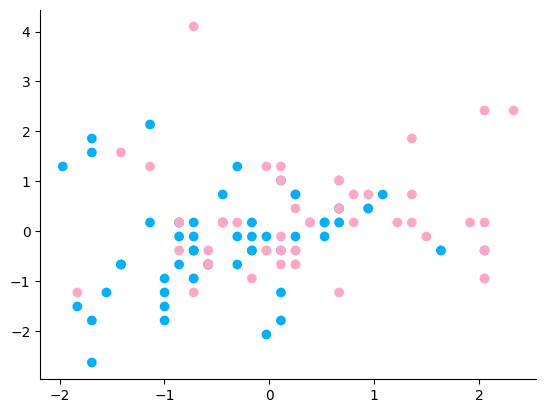

In [134]:
#Tracer d'abord les données d'entrainement avant d'utiliser la fonction ci-dessous
#Regarder les commentaires de la fonction pour mieux comprendre, au début du notebook

plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train)


### Faire varier le critère de régularisation C

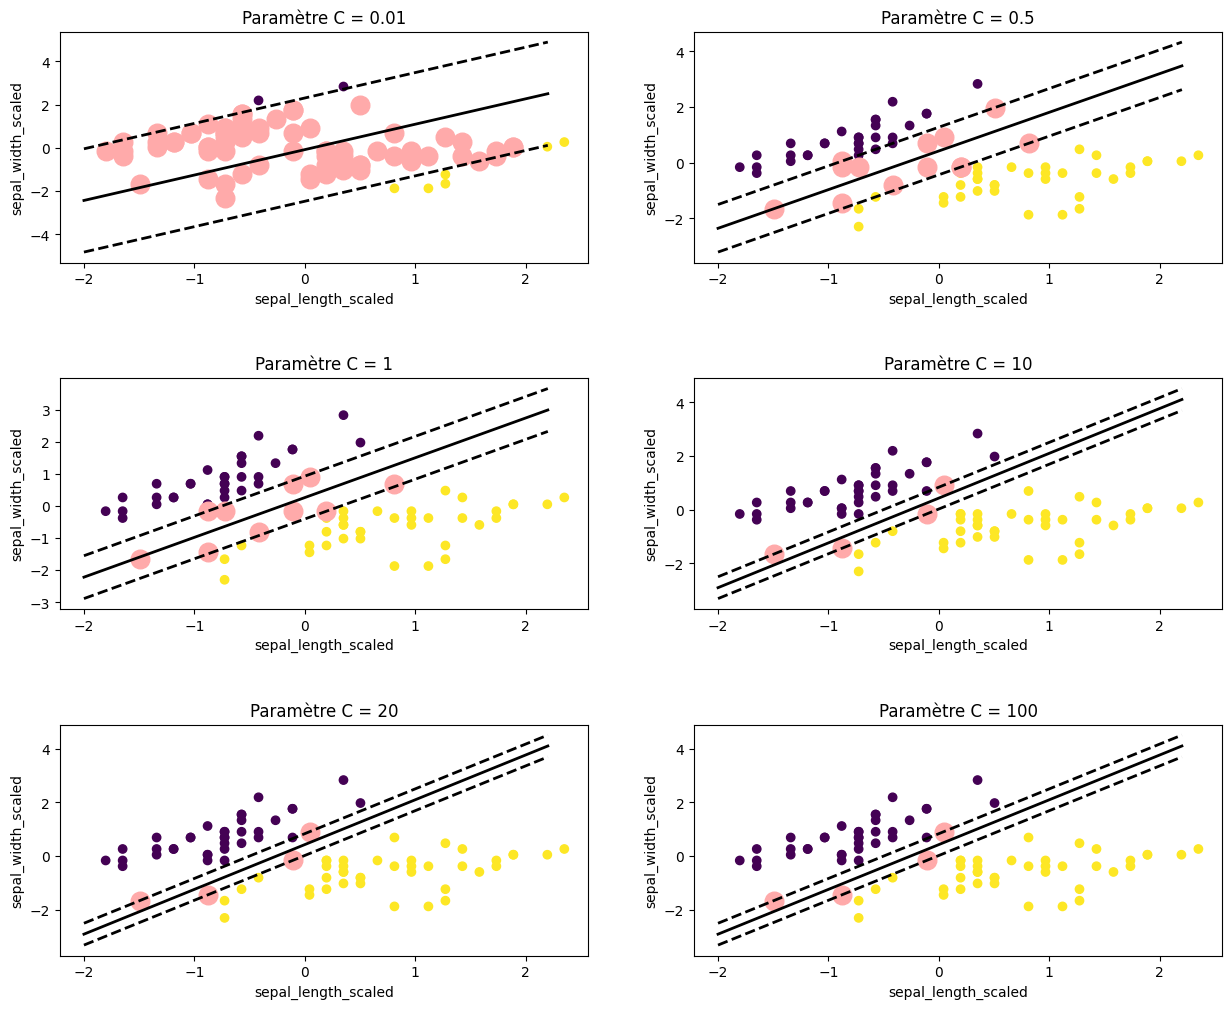

In [36]:
#Paramètre régularisation
C = [0.01,0.5,1,10,20,100]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc[:,0:2], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_sc[:,0], 
               X_train_sc[:,1], 
                c=y_train
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel(list_two_col[0]+'_scaled')
    plt.ylabel(list_two_col[1]+'_scaled')
    



Plus on augmente la valeur de C plus on obtient des marges proches de la fronitère de décision.

- Une faible valeur de C autorise un nombre de 'violations' importante à l'intérieur des marges
- Une forte valeur de C diminue le nombre de violations' à l'intérieur des marges


#### Même principe avec 2 autres features

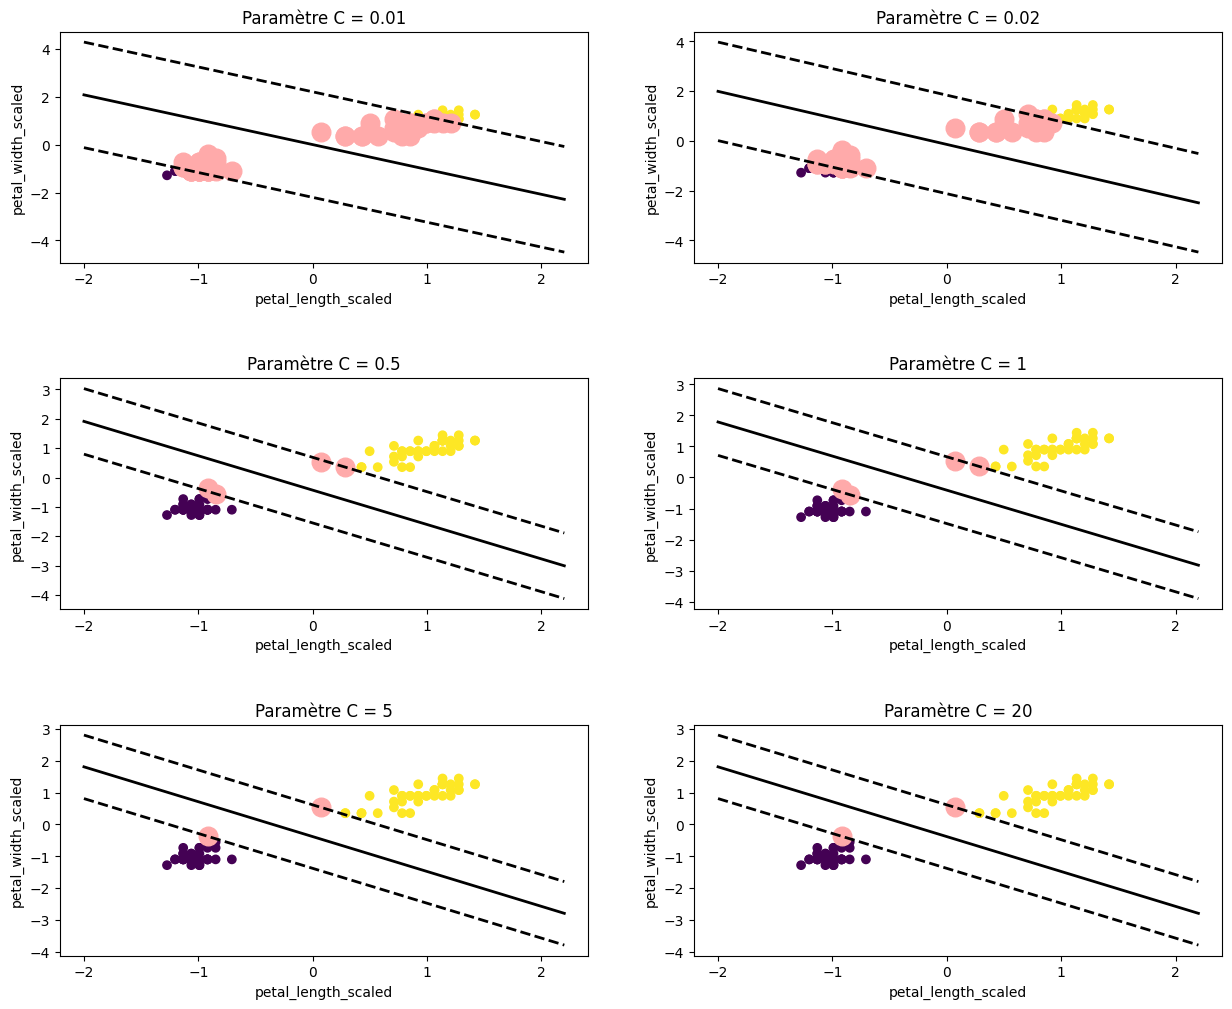

In [37]:
#Nouveaux features

list_two_col_new = bin_iris.columns[2:4]


#Paramètre régularisation
C = [0.01,0.02,0.5,1,5,20]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc[:,2:4], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_sc[:,2], 
               X_train_sc[:,3], 
                c=y_train
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel(list_two_col_new[0]+'_scaled')
    plt.ylabel(list_two_col_new[1]+'_scaled')
    



#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [38]:
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/01_SVM/td/data/iris_noise.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

iris_noise = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')
iris_noise['species'] = iris_noise['species'].astype('int32')

#Colnames
features_names = iris_noise.columns[0:4]

In [39]:
#On retire une espèce cette fois là 0
bin_iris_noise = iris_noise[iris_noise.species!=0]

In [40]:
#Train and Split
X_train, X_test, y_train , y_test  = train_test_split(bin_iris_noise[features_names], 
                                                      bin_iris_noise['species'], 
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                      random_state=42
                )

In [41]:
#Scaling features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [42]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
lgr.fit(X_train_sc, y_train)

#Linear SVM
l_SVC = LinearSVC(random_state=42, max_iter=2000)
l_SVC.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_sc,y_train)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_sc, y_train)

c:\Users\roulB\Desktop\cours_data_svm_2023_24\git_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SGDClassifier(random_state=42)

In [135]:
# Get cross_val_score for each function

cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_lsvc = cross_val_score(l_SVC, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_sgdc = cross_val_score(sgdc_svm, X_train_sc, y_train, cv=5, scoring='accuracy')

c:\Users\roulB\Desktop\cours_data_svm_2023_24\git_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\roulB\Desktop\cours_data_svm_2023_24\git_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\roulB\Desktop\cours_data_svm_2023_24\git_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\roulB\Desktop\cours_data_svm_2023_24\git_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dua

In [136]:
cvs_lgr

array([0.91, 0.87, 0.77, 0.91, 0.64])

In [137]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc']

In [138]:
df_cross

,fold1,fold2,fold3,fold4,fold5,model
0,0.913043,0.869565,0.772727,0.909091,0.636364,lgr
1,0.869565,0.826087,0.727273,0.863636,0.590909,lsvc
2,0.608696,0.782609,0.636364,0.727273,0.681818,sgdc
3,0.913043,0.826087,0.772727,0.909091,0.772727,svc


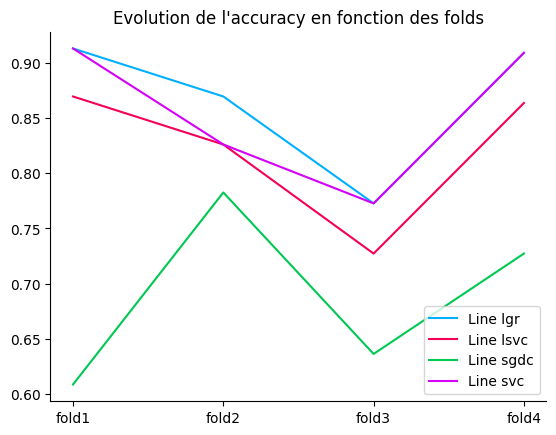

In [139]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [46]:
df_cross.head(5)

,fold1,fold2,fold3,fold4,fold5,model
0,0.913043,0.869565,0.772727,0.909091,0.636364,lgr
1,0.869565,0.826087,0.727273,0.863636,0.590909,lsvc
2,0.608696,0.782609,0.636364,0.727273,0.681818,sgdc
3,0.913043,0.826087,0.772727,0.909091,0.772727,svc


In [47]:
for i in range(4):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuray de 0.8201581027667985 et un std : 0.11726880394582447
Le modèle N° 1 a une accuray de 0.775494071146245 et un std : 0.11787174944193525
Le modèle N° 2 a une accuray de 0.6873517786561264 et un std : 0.06979391082972648
Le modèle N° 3 a une accuray de 0.8387351778656127 et un std : 0.06954444084279071


#### Choix du modèle

On prend le modèle *SVC* comme modèle final. Il est celui qui a le meilleur score en moyenne sur les folds **84%**.
A l'inverse le modèle *SGDClassifier* offre des performances beaucoup plus faibles **69%** de bonnes prédictions. Il s'agit d'un modèle qui offre beaucoup plus d'hyperparamètres, il nécessite beaucoup de tunage avant d'offrir des bonnes performances.

De plus le modèle *SVC* est celui qui a le moins de variance entre les scores de ses folds **0.07** de std. Le modèle semble stable et donc il possède moins de chance d'être en under ou overfitting.

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.